In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [42]:
file = pd.read_csv('C:\\Users\\akash\\Downloads\\PYTHON\\data_jobs.csv')
file.head(1)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN


In [43]:
# clean 

file.job_posted_date = pd.to_datetime(file.job_posted_date)

file.dropna(subset= ['job_skills'], inplace= True)
file['job_skills'] = file.job_skills.apply(lambda skills: ast.literal_eval(skills))

In [ ]:
file.dropna(subset= ['salary_year_avg'], inplace= True)
df_da_canada = file.copy()

In [47]:
df_da_canada.job_title_short.unique()

array(['Data Scientist', 'Data Engineer', 'Data Analyst',
       'Senior Data Engineer', 'Business Analyst', 'Software Engineer',
       'Senior Data Analyst', 'Machine Learning Engineer',
       'Senior Data Scientist', 'Cloud Engineer'], dtype=object)

In [53]:
# look for Data analyst salary in Canada only 
df_da_canada = df_da_canada[df_da_canada.job_title_short.isin(['Data Scientist', 'Data Engineer', 'Data Analyst','Business Analyst']) & (df_da_canada.job_country == 'Canada')]


In [57]:
df_da_canada = df_da_canada.explode('job_skills')

df_da_canada [['salary_year_avg' , 'job_skills']]

,salary_year_avg,job_skills
5554,64600.0,sql
5554,64600.0,power bi
10270,125000.0,golang
10270,125000.0,kotlin
10270,125000.0,scala
...,...,...
783881,175000.0,oracle
783881,175000.0,hadoop
783881,175000.0,spark
783881,175000.0,kafka


In [65]:
df_da_canada_group = df_da_canada.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_da_canada_pay = df_da_canada_group.sort_values(by= 'count', ascending= False).head(10)
df_da_canada_skill = df_da_canada_group.sort_values(by= 'median', ascending= False).head(10)
print(df_da_canada_pay , df_da_canada_skill)

            count    median
job_skills                 
python        175  100000.0
sql           171  100500.0
aws           102  121250.0
spark          77  111175.0
azure          69   90000.0
java           51  105000.0
snowflake      51  125000.0
kafka          50  100000.0
hadoop         47  120000.0
tableau        46   99575.0             count    median
job_skills                 
mongo           1  211000.0
ubuntu          1  175000.0
no-sql          4  175000.0
rust            2  161562.5
elixir          1  161250.0
seaborn         3  157500.0
dax             3  155904.5
looker         16  152250.0
aurora          1  147500.0
phoenix         2  143125.0


<Axes: ylabel='job_skills'>

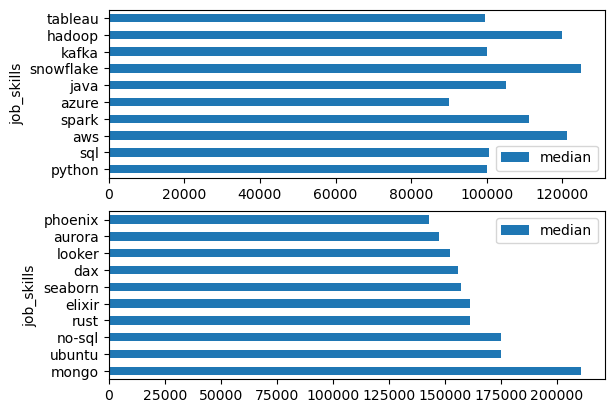

In [69]:
fig, ax = plt.subplots(2,1)

df_da_canada_pay.plot(kind='barh',y='median', ax = ax[0])
df_da_canada_skill.plot(kind='barh',y= 'median', ax= ax[1])